#  <center> <span style="color:blue"> Compte Rendu TP N°2   <center> </span> <center> <center><span style="color:blue">Classification avec des réseaux de neurones entièrement connectés</span></center>

### <center>Réaliser par : Jihen Fennani et Chaima Znaidi </center>

## Objectifs
Explorer et comprendre l'utilisation des réseaux de neurones entièrement connectés dans des tâches de classification, à la fois binaire et multi-classes.

## I. Classification binaire :

La classification binaire vise à appliquer des réseaux de neurones entièrement connectés pour distinguer entre deux classes distinctes à partir d'un ensemble de données .

### 1. Dataset :

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dimensions du dataset :
Nombre d'échantillons : 1000
Nombre de caractéristiques par échantillon : 2


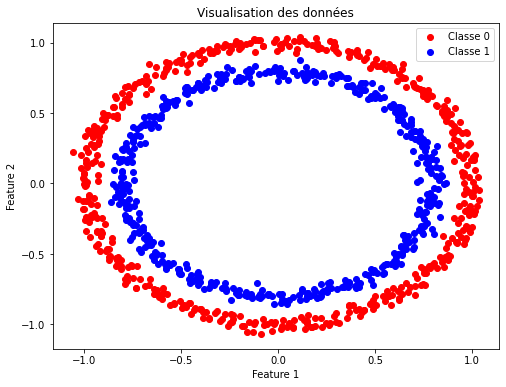

Nombre d'échantillons dans l'ensemble d'apprentissage : 800
Nombre d'échantillons dans l'ensemble de test : 200


In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

print("Dimensions du dataset :")
print("Nombre d'échantillons :", X.shape[0])
print("Nombre de caractéristiques par échantillon :", X.shape[1])


plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Classe 1')
plt.title('Visualisation des données')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Nombre d'échantillons dans l'ensemble d'apprentissage :", X_train.shape[0])
print("Nombre d'échantillons dans l'ensemble de test :", X_test.shape[0])


### 2. Définition du modèle

#### 2.1 Cycle de vie d’un modèle :

Un modèle a un cycle de vie. Les cinq étapes du cycle de vie sont les suivantes :<br>
**1. Définir le modèle**<br>
Cette étape implique la sélection de l'architecture du modèle qui est la mieux adaptée au problème à résoudre. Pour un réseau de neurones, cela comprend la décision sur :
- Le nombre de couches à utiliser.
- Le nombre de neurones dans chaque couche.
- Les fonctions d'activation à appliquer (par exemple, ReLU, sigmoid, tanh).

**2. Compiler le modèle**
Cette étape prépare le modèle pour l'entraînement en spécifiant :
- La fonction de perte : Elle mesure à quel point les prédictions du modèle sont éloignées des valeurs réelles. 
- L'optimiseur : Méthode utilisée pour ajuster les paramètres du modèle afin de minimiser la fonction de perte (par exemple, SGD, Adam).
- Les métriques : Pour évaluer les performances du modèle pendant et après l'entraînement (par exemple, précision, rappel).<br>

**3. Entrainer le modèle**
L'entraînement est le processus où le modèle apprend à partir des données fournies en ajustant ses poids pour minimiser la fonction de perte.

**4. Évaluer le modèle**
Une fois l'entraînement terminé, le modèle est évalué pour déterminer sa performance sur un ensemble de données de test qui n'a pas été utilisé pendant l'entraînement. Cette évaluation aide à détecter des problèmes comme le surajustement (overfitting) ou le sous-ajustement (underfitting) et fournit une mesure de la façon dont le modèle est susceptible de se comporter lorsqu'il est déployé dans un environnement réel.

**5. Faire des prédictions** 


#### 2.2 Définition du modèle FCNN :

In [2]:
! pip install matplotlib numpy

In [3]:
!pip install tensorflow

In [4]:
# Exécutez cette cellule dans votre Jupyter Notebook
import sys
!{sys.executable} -m pip install --upgrade numpy
!{sys.executable} -m pip install --upgrade tensorflow


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.2.1
    Uninstalling h5py-3.2.1:
      Successfully uninstalled h5py-3.2.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


In [15]:
! pip install optree


#### 2.3 Compilation du modèle :

 1. le modèle constitué de:
 - une couche entièrement connectée avec **5 neurones** cachés
 - une activation **sigmoide**,la fonction de perte (entropie croisée binaire) et l’optimiseur (**SGD - Stochastic Gradient Descent**)
 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle
model1 = Sequential()

model1.add(Dense(5, input_dim=2, activation='relu')) # 

model1.add(Dense(1, activation='sigmoid')) 

model1.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model1.summary()


C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 5)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21 (84.00 B)

 Trainable params: 21 (84.00 B)

 Non-trainable params: 0 (0.00 B)

#### Entrainement de modèle 

In [5]:
from tensorflow.keras.callbacks import Callback
import numpy as np

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:  # Affichage toutes les 10 époques
            print(f"Après l'époque {epoch}:")
            print(f" - Loss: {logs['loss']}")
            print(f" - Accuracy: {logs['accuracy'] * 100}%")
            # Calcul et affichage de la perte et de la précision de test
            test_scores = self.model.evaluate(X_test, y_test, verbose=0)
            print(f" - Test Loss: {test_scores[0]}")
            print(f" - Test Accuracy: {test_scores[1] * 100}%")

# Configuration de l'entraînement
epochs = 300

# Entraînement du modèle
history = model1.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[CustomCallback()],
                    verbose=0)  # Mettre verbose=1 pour voir la progression après chaque époque

Après l'époque 0:
 - Loss: 0.7381210327148438
 - Accuracy: 50.37500262260437%
 - Test Loss: 0.7456023693084717
 - Test Accuracy: 47.49999940395355%
Après l'époque 10:
 - Loss: 0.7082015872001648
 - Accuracy: 51.499998569488525%
 - Test Loss: 0.7168142795562744
 - Test Accuracy: 48.500001430511475%
Après l'époque 20:
 - Loss: 0.6967392563819885
 - Accuracy: 51.875001192092896%
 - Test Loss: 0.7050716280937195
 - Test Accuracy: 49.000000953674316%
Après l'époque 30:
 - Loss: 0.6906806230545044
 - Accuracy: 52.125000953674316%
 - Test Loss: 0.6983800530433655
 - Test Accuracy: 50.0%
Après l'époque 40:
 - Loss: 0.6865957379341125
 - Accuracy: 52.24999785423279%
 - Test Loss: 0.6939294338226318
 - Test Accuracy: 50.0%
Après l'époque 50:
 - Loss: 0.6835252642631531
 - Accuracy: 53.125%
 - Test Loss: 0.690731406211853
 - Test Accuracy: 50.49999952316284%
Après l'époque 60:
 - Loss: 0.6808609962463379
 - Accuracy: 53.50000262260437%
 - Test Loss: 0.6881022453308105
 - Test Accuracy: 50.4999995

####  Evaluation du modèle

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step


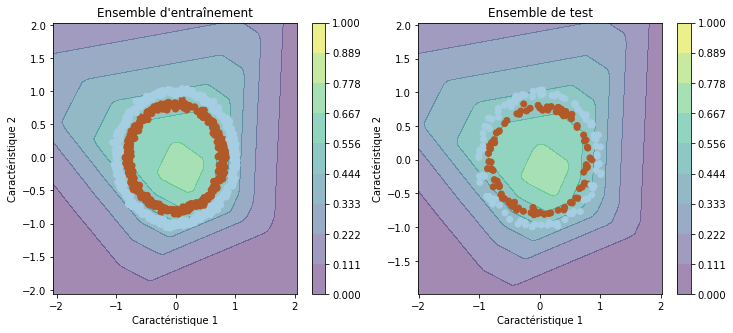

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model):
    # Définition des axes en se basant sur les données
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    
    # Prédiction sur la grille
    labels = model1.predict(np.c_[xx.ravel(), yy.ravel()])
    z = labels.reshape(xx.shape)
    
    # Tracé de la frontière de décision
    plt.contourf(xx, yy, z, alpha=0.5, levels=np.linspace(0, 1, 10))
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')
    
    plt.xlabel("Caractéristique 1")
    plt.ylabel("Caractéristique 2")
    plt.title("Frontière de décision")

# Tracé pour l'ensemble d'entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model1)
plt.title("Ensemble d'entraînement")

# Tracé pour l'ensemble de test
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, model1)
plt.title("Ensemble de test")

plt.show()


 2. le modèle constitué de trois couches denses : 
- les deux premières avec **20 et 10 neurones** respectivement et des activations **ReLU**
- D'une couche de sortie avec un seul neurone utilisant une activation **sigmoïde**, optimisé avec **Adam**

Pour la classification binaire en utilisant la perte d'entropie croisée binaire et mesurant la précision comme métrique.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle
model = Sequential()

model.add(Dense(20, input_dim=2, activation='relu')) # 
model.add(Dense(10, input_dim=20, activation='relu')) # 

model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 20)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 281 (1.10 KB)

 Trainable params: 281 (1.10 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import Callback
import numpy as np

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:  # Affichage toutes les 10 époques
            print(f"Après l'époque {epoch}:")
            print(f" - Loss: {logs['loss']}")
            print(f" - Accuracy: {logs['accuracy'] * 100}%")
            # Calcul et affichage de la perte et de la précision de test
            test_scores = self.model.evaluate(X_test, y_test, verbose=0)
            print(f" - Test Loss: {test_scores[0]}")
            print(f" - Test Accuracy: {test_scores[1] * 100}%")

# Configuration de l'entraînement
epochs = 300

# Entraînement du modèle
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[CustomCallback()],
                    verbose=0)  # Mettre verbose=1 pour voir la progression après chaque époque



Après l'époque 0:
 - Loss: 0.7033451795578003
 - Accuracy: 49.25000071525574%
 - Test Loss: 0.7008808851242065
 - Test Accuracy: 47.999998927116394%
Après l'époque 10:
 - Loss: 0.6756618618965149
 - Accuracy: 50.62500238418579%
 - Test Loss: 0.6796109080314636
 - Test Accuracy: 50.49999952316284%
Après l'époque 20:
 - Loss: 0.625008225440979
 - Accuracy: 82.62500166893005%
 - Test Loss: 0.6321806311607361
 - Test Accuracy: 77.99999713897705%
Après l'époque 30:
 - Loss: 0.5109273791313171
 - Accuracy: 98.62499833106995%
 - Test Loss: 0.5294868350028992
 - Test Accuracy: 92.00000166893005%
Après l'époque 40:
 - Loss: 0.3487412929534912
 - Accuracy: 99.75000023841858%
 - Test Loss: 0.38433003425598145
 - Test Accuracy: 98.50000143051147%
Après l'époque 50:
 - Loss: 0.2132275402545929
 - Accuracy: 100.0%
 - Test Loss: 0.25458046793937683
 - Test Accuracy: 99.50000047683716%
Après l'époque 60:
 - Loss: 0.129794180393219
 - Accuracy: 100.0%
 - Test Loss: 0.17073926329612732
 - Test Accuracy:

 3. Ce modèle est un réseau de neurones entièrement connecté constitué de trois couches denses :
 - les deux premières avec **50 neurones** chacune et activation **ReLU**
 - suivies d'une couche de sortie avec un seul neurone utilisant l'activation **sigmoïde**

Compilé avec l'optimiseur **SGD** pour une tâche de classification binaire en utilisant la perte d'entropie croisée binaire et évalué sur la précision.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Définition du modèle
model = Sequential()

# Ajout de la première couche entièrement connectée avec 100 neurones cachés
model.add(Dense(50, input_dim=2, activation='relu')) # 
# Ajout de la première couche entièrement connectée avec 100 neurones cachés
model.add(Dense(50, input_dim=100, activation='relu')) # 

# Ajustement : Ajout d'une couche de sortie pour la classification binaire
model.add(Dense(1, activation='sigmoid'))  # Notez le changement ici

# Compilation du modèle avec la configuration correcte
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage du résumé du modèle mis à jour
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

#### 2.4 Entrainement du modèle :

In [10]:
from tensorflow.keras.callbacks import Callback
import numpy as np

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:  # Affichage toutes les 10 époques
            print(f"Après l'époque {epoch}:")
            print(f" - Loss: {logs['loss']}")
            print(f" - Accuracy: {logs['accuracy'] * 100}%")
            # Calcul et affichage de la perte et de la précision de test
            test_scores = self.model.evaluate(X_test, y_test, verbose=0)
            print(f" - Test Loss: {test_scores[0]}")
            print(f" - Test Accuracy: {test_scores[1] * 100}%")

# Configuration de l'entraînement
epochs = 300

# Entraînement du modèle
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    callbacks=[CustomCallback()],
                    verbose=0)  # Mettre verbose=1 pour voir la progression après chaque époque



Après l'époque 0:
 - Loss: 0.6917057037353516
 - Accuracy: 51.499998569488525%
 - Test Loss: 0.6953571438789368
 - Test Accuracy: 43.50000023841858%
Après l'époque 10:
 - Loss: 0.6884371042251587
 - Accuracy: 52.74999737739563%
 - Test Loss: 0.693074643611908
 - Test Accuracy: 46.50000035762787%
Après l'époque 20:
 - Loss: 0.6853477358818054
 - Accuracy: 55.37499785423279%
 - Test Loss: 0.6908824443817139
 - Test Accuracy: 49.000000953674316%
Après l'époque 30:
 - Loss: 0.6822092533111572
 - Accuracy: 61.000001430511475%
 - Test Loss: 0.6885569095611572
 - Test Accuracy: 54.500001668930054%
Après l'époque 40:
 - Loss: 0.6789439916610718
 - Accuracy: 67.00000166893005%
 - Test Loss: 0.6861258149147034
 - Test Accuracy: 59.50000286102295%
Après l'époque 50:
 - Loss: 0.6753970384597778
 - Accuracy: 72.50000238418579%
 - Test Loss: 0.683369517326355
 - Test Accuracy: 63.999998569488525%
Après l'époque 60:
 - Loss: 0.6712986826896667
 - Accuracy: 76.49999856948853%
 - Test Loss: 0.679815232

le nombre d'epoc s'améliore mais n'est la solution optimale 

#### 2.5 Evaluation du modèle

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step


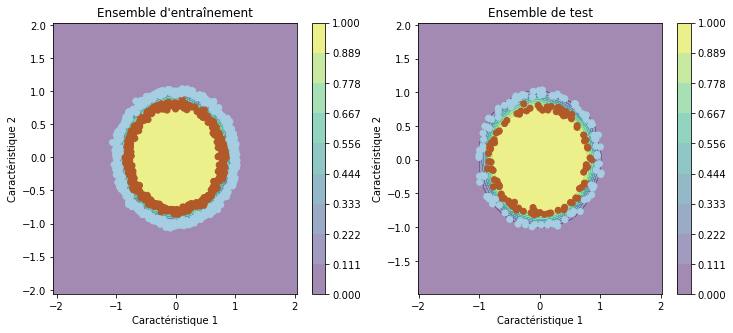

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, y, model):
    # Définition des axes en se basant sur les données
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    
    # Prédiction sur la grille
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = labels.reshape(xx.shape)
    
    # Tracé de la frontière de décision
    plt.contourf(xx, yy, z, alpha=0.5, levels=np.linspace(0, 1, 10))
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Paired')
    
    plt.xlabel("Caractéristique 1")
    plt.ylabel("Caractéristique 2")
    plt.title("Frontière de décision")

# Tracé pour l'ensemble d'entraînement
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model)
plt.title("Ensemble d'entraînement")

# Tracé pour l'ensemble de test
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, model)
plt.title("Ensemble de test")

plt.show()


## Interprétation 

Le modèle 2   le mieux performermant , avec une perte très faible et une précision de 100% sur l'ensemble d'entraînement et de test. Cependant, cela pourrait indiquer un possible surapprentissage (overfitting), nécessitant une évaluation plus approfondie.

- **Impact du nombre d'époques** : 
Une augmentation du nombre d'époques peut entraîner une diminution de la perte sur l'ensemble d'entraînement, mais une augmentation de la perte sur l'ensemble de test pourrait indiquer du surapprentissage.<br>
Une augmentation de la précision sur l'ensemble d'entraînement peut indiquer que le modèle apprend mieux avec plus d'époques, mais une observation similaire sur l'ensemble de test est nécessaire pour valider la généralisation du modèle.
- **Impact de l'optimiseur** :
Différents optimiseurs peuvent converger à des vitesses différentes. Par exemple, Adam peut converger plus rapidement que SGD.
Certains optimiseurs peuvent mieux gérer les problèmes de minimisation, conduisant à des solutions de meilleure qualité ou à des minima locaux plus avantageux.
- **Impact du nombre de couches** :
L'ajout de couches peut permettre au modèle d'apprendre des représentations plus complexes, ce qui peut améliorer les performances si le problème est suffisamment complexe.
Cependant, un nombre excessif de couches peut entraîner du surapprentissage, en particulier avec des ensembles de données plus petits.
- **Impact du nombre de neurones** :
Un nombre plus élevé de neurones dans une couche peut permettre au modèle de capturer des motifs plus fins et complexes dans les données.
Cependant, un nombre excessif de neurones peut conduire à une surajustement si le modèle commence à mémoriser les données d'entraînement plutôt que de généraliser.

## II. La multi-Classification :

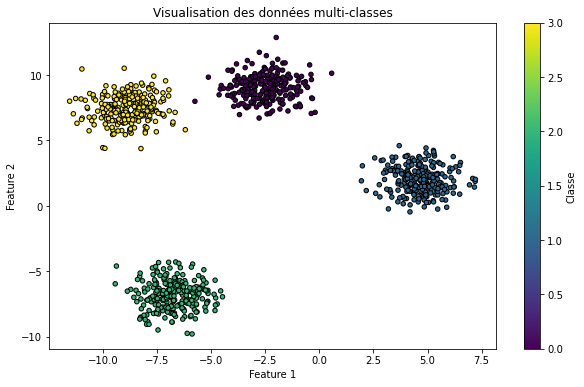

In [7]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Création des données multi-classes
X, y = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=42)

# 2. Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Visualisation des données multi-classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Classe')
plt.show()


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Initialisation du modèle
model = Sequential()

# Ajout de la première couche cachée
model.add(Dense(64, input_dim=2, activation='relu'))

# Ajout de la deuxième couche cachée
model.add(Dense(32, activation='relu'))

# Ajout de la couche de sortie
model.add(Dense(4, activation='softmax'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,404 (9.39 KB)

 Trainable params: 2,404 (9.39 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
import numpy as np

# Définition du modèle
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 9:  # Affichage toutes les 10 époques (en commençant par 0)
            print(f"Après l'époque {epoch + 1}:")
            print(f" - Loss: {logs['loss']:.4f}")
            print(f" - Accuracy: {logs['accuracy'] * 100:.2f}%")
            # Calcul et affichage de la perte et de la précision de test
            test_scores = self.model.evaluate(X_test, y_test, verbose=0)
            print(f" - Test Loss: {test_scores[0]:.4f}")
            print(f" - Test Accuracy: {test_scores[1] * 100:.2f}%\n")

# Entraînement du modèle
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test),
                    callbacks=[CustomCallback()],
                    verbose=0)  # Mettre verbose=1 pour voir la progression après chaque époque


Après l'époque 10:
 - Loss: 0.0028
 - Accuracy: 99.87%
 - Test Loss: 0.0024
 - Test Accuracy: 100.00%

Après l'époque 20:
 - Loss: 0.0021
 - Accuracy: 99.87%
 - Test Loss: 0.0012
 - Test Accuracy: 100.00%

Après l'époque 30:
 - Loss: 0.0025
 - Accuracy: 99.87%
 - Test Loss: 0.0001
 - Test Accuracy: 100.00%

Après l'époque 40:
 - Loss: 0.0033
 - Accuracy: 99.87%
 - Test Loss: 0.0022
 - Test Accuracy: 100.00%

Après l'époque 50:
 - Loss: 0.0030
 - Accuracy: 99.75%
 - Test Loss: 0.0013
 - Test Accuracy: 100.00%

Après l'époque 60:
 - Loss: 0.0030
 - Accuracy: 99.87%
 - Test Loss: 0.0002
 - Test Accuracy: 100.00%

Après l'époque 70:
 - Loss: 0.0027
 - Accuracy: 99.87%
 - Test Loss: 0.0013
 - Test Accuracy: 100.00%

Après l'époque 80:
 - Loss: 0.0016
 - Accuracy: 100.00%
 - Test Loss: 0.0003
 - Test Accuracy: 100.00%

Après l'époque 90:
 - Loss: 0.0066
 - Accuracy: 99.87%
 - Test Loss: 0.0008
 - Test Accuracy: 100.00%

Après l'époque 100:
 - Loss: 0.0022
 - Accuracy: 99.87%
 - Test Loss: 0.

## Calcul des Métriques de Classification

Pour comprendre la performance d'un modèle de classification, plusieurs métriques d'évaluation sont utilisées.<br>
1. Précision Globale (Accuracy)
Définition : La précision globale est le rapport du nombre total de prédictions correctes à l'ensemble des prédictions faites.

2. Rappel (Recall) ou Sensibilité
Définition : Le rappel est la proportion de vrais positifs identifiés correctement par le modèle par rapport au nombre total de cas qui sont réellement positifs.

3. Précision (Precision)
Définition : La précision est la proportion de vrais positifs par rapport à tous les résultats positifs identifiés par le modèle (incluant les faux positifs).

4. Score F1
Définition : Le score F1 est la moyenne harmonique de la précision et du rappel, fournissant un équilibre entre ces deux métriques.
5. Matrice de Confusion
Définition : Une matrice qui visualise les performances d'un modèle de classification. Chaque ligne de la matrice représente les instances dans une classe réelle, tandis que chaque colonne représente les instances dans une classe prédite.
Composants :
Vrais Positifs (VP) : Correctement prédits positifs.
Vrais Négatifs (VN) : Correctement prédits négatifs.
Faux Positifs (FP) : Incorrectement prédits comme positifs.
Faux Négatifs (FN) : Incorrectement prédits comme négatifs.

In [10]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Précision globale
accuracy = accuracy_score(y_test, y_pred_classes)

# Rappel par classe
recall = recall_score(y_test, y_pred_classes, average=None)

# Score F1 par classe
f1 = f1_score(y_test, y_pred_classes, average=None)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Rapport de classification
class_report = classification_report(y_test, y_pred_classes)

print(f"Précision globale: {accuracy:.2f}")
print(f"Rappel par classe: {recall}")
print(f"Score F1 par classe: {f1}")
print("Matrice de confusion:\n", conf_matrix)
print("Rapport de classification:\n", class_report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Précision globale: 1.00
Rappel par classe: [1. 1. 1. 1.]
Score F1 par classe: [1. 1. 1. 1.]
Matrice de confusion:
 [[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]
Rapport de classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



###  Interprétation des Résultats


#### Matrice de Confusion
Diagonale parfaite:
- Classe 0 : 49 prédictions correctes, aucune incorrecte.
- Classe 1 : 41 prédictions correctes, aucune incorrecte.
- Classe 2 : 53 prédictions correctes, aucune incorrecte.
- Classe 3 : 57 prédictions correctes, aucune incorrecte.

Il n'y a aucun faux positif ou faux négatif pour aucune classe, ce qui est idéal.

##### Macro Average (Macro avg)
La moyenne macroscopique calcule la métrique (par exemple, précision, rappel, score F1) indépendamment pour chaque classe et puis prend la moyenne arithmétique de ces mesures.<br>
Cela signifie que chaque classe contribue également à la moyenne finale, indépendamment du nombre d'échantillons dans chaque classe.
##### Weighted Average (Weighted avg)
Définition : La moyenne pondérée calcule aussi la métrique pour chaque classe indépendamment, mais elle prend ensuite une moyenne pondérée de ces métriques, où le poids est le nombre d'échantillons dans chaque classe.<br>
Cela signifie que les classes avec plus d'échantillons ont un impact plus grand sur la métrique globale.

### - Frontières(s) de décision pour les ensembles d’entrainement et de test.

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
7813/7813 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


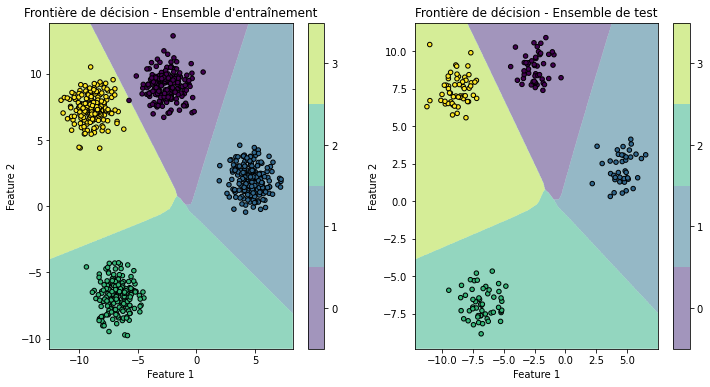

In [11]:
def plot_decision_boundary(X, y, model):
    # Créer une grille de points couvrant l'espace des features
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 500)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 500)
    xx, yy = np.meshgrid(x_span, y_span)
    
    # Faire des prédictions sur tous les points de la grille
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = np.argmax(labels, axis=1).reshape(xx.shape)
    
    # Tracer la frontière de décision en colorant la grille
    plt.contourf(xx, yy, z, alpha=0.5, levels=np.arange(len(np.unique(y))+1)-0.5, cmap='viridis', antialiased=True)
    plt.colorbar(ticks=np.arange(len(np.unique(y))))
    # Tracer les points de données
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Frontière de décision')

# Tracé pour l'ensemble d'entraînement
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, model)
plt.title('Frontière de décision - Ensemble d\'entraînement')

# Tracé pour l'ensemble de test
plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, model)
plt.title('Frontière de décision - Ensemble de test')

plt.show()


### Interprétation Globale
- Généralisation : La capacité du modèle à appliquer avec succès les frontières de décision apprises de l'ensemble d'entraînement à l'ensemble de test indique une bonne généralisation. Cela suggère que le modèle est robuste et performe bien non seulement sur les données sur lesquelles il a été formé mais aussi sur de nouvelles données.<br>
- Complexité des Frontières : Les frontières complexes mais bien définies indiquent que le modèle peut capturer des relations complexes entre les caractéristiques sans être trop simpliste ou trop adapté aux données d'entraînement.<br>

La capacité du modèle à fonctionner efficacement dans des conditions réelles, fournissant une validation visuelle importante de ses performances de classification.